### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sn

In [3]:
dataset = pd.read_csv("C:/Users/LENOVO/heart.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Looking for correlations between input varibles and between each input and target

In [11]:
correlation_matrix = dataset.corr()
print (correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

### Very low correlated variabes are excluded

In [14]:
# Compute correlation with target
correlation_matrix = dataset.corr(numeric_only=True)
target_corr = correlation_matrix['target'].drop('target')

# Select features with |correlation| > 0.22
selected_features = target_corr[abs(target_corr) > 0.22].index.tolist()

print("Selected features based on |correlation| > 0.22:")
print(selected_features)

# Create new input dataset excluding target and weakly correlated variables
X = dataset[selected_features]
y = dataset['target']


Selected features based on |correlation| > 0.22:
['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


### Modeling using Random Forest

Selected features: ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Confusion Matrix:
 [[20  8]
 [ 1 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



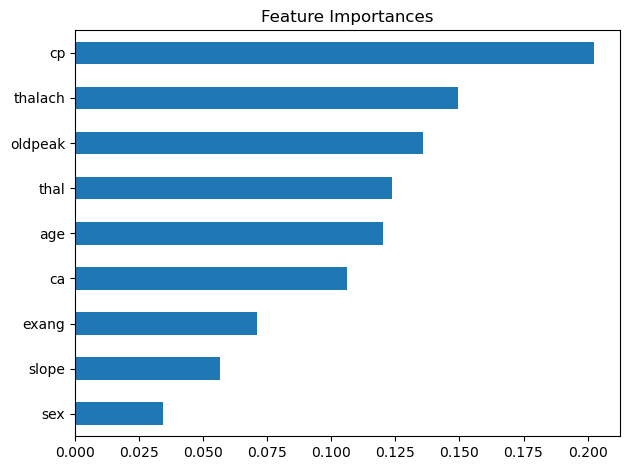

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Compute correlation matrix
correlation_matrix = dataset.corr(numeric_only=True)
target_corr = correlation_matrix['target'].drop('target')

# Step 2: Select only features with |correlation| > 0.22
selected_features = target_corr[abs(target_corr) > 0.22].index.tolist()

print("Selected features:", selected_features)

# Step 3: Prepare data
X = dataset[selected_features]
y = dataset['target']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Feature importances
import matplotlib.pyplot as plt
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()


### Thresholding the target probability

Selected features: ['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Confusion Matrix:
 [[21  7]
 [ 1 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



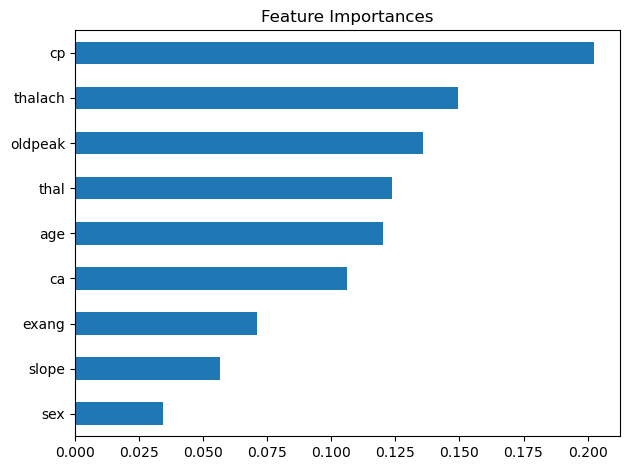

In [53]:

# Step 1: Compute correlation matrix
correlation_matrix = dataset.corr(numeric_only=True)
target_corr = correlation_matrix['target'].drop('target')

# Step 2: Select only features with |correlation| > 0.22
selected_features = target_corr[abs(target_corr) > 0.22].index.tolist()
print("Selected features:", selected_features)

# Step 3: Prepare data
X = dataset[selected_features]
y = dataset['target']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict probabilities and adjust threshold
y_proba = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.53
y_pred = (y_proba > threshold).astype(int)

# Step 7: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Feature importances
plt.tight_layout()
plt.show()
